# Assignment 1 - Regression Models
### Submitted By:- Hemang Sharma (24695785)

## Part A: Experiment on univariate linear regression. 

In this part we will be creating two diffrent univariate linear regression models. The 2 selected variables from dataset are 'avgDeathsPerYear' & 'PctPublicCoverage'

To train two different univariate linear regression models in Python, we use following steps:
1. Import the necessary libraries
2. Prepare the data
3. Train the linear regression models
4. Make predictions and evaluate the models

Baseline mean squared error: 817.4561502434041
For Our first Univariate linear regression for avgDeathsPerYear

MSE for avgDeathsPerYear: 751.9847713345506
Mean Absolute Error: 21.153177735227533
Coefficients:  [[-0.00562028]]
Intercept:  [179.86346331]

For Our first Univariate linear regression for avgDeathsPerYear

MSE for PctPublicCoverage: 626.283368238365
Mean Absolute Error: 21.153177735227533
Coefficients:  [[1.46760054]]
Intercept:  [125.61021924]



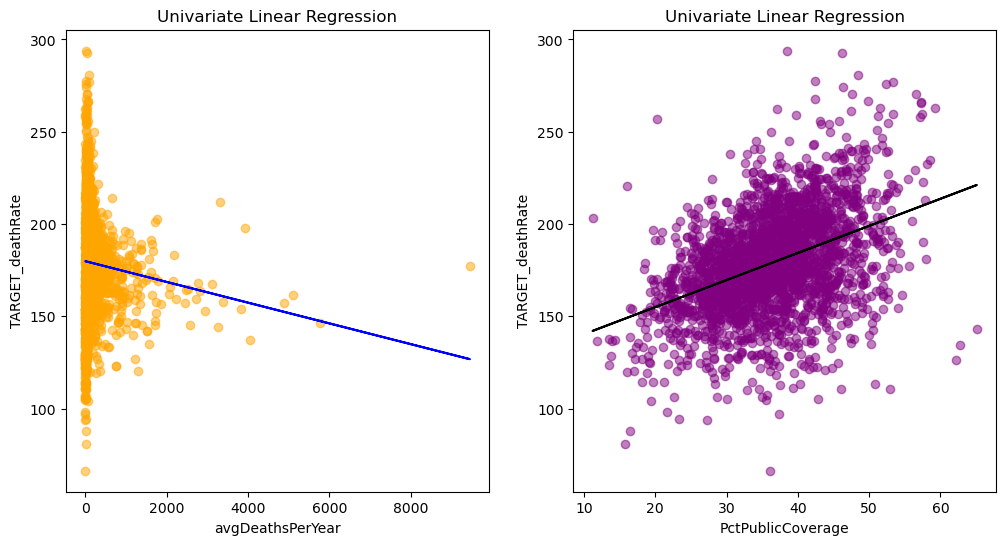

For Our first Univariate linear regression for avgDeathsPerYear on test data

MSE for avgDeathsPerYear: 810.50694706718
Mean Absolute Error: 21.31348043486158

For Our first Univariate linear regression for PctPublicCoverage on test data

MSE for PctPublicCoverage: 714.8268584835553
Mean Absolute Error: 19.506565054243513

MSE and MAE for training data:
MSE for avgDeathsPerYear: 751.9847713345506
MAE for avgDeathsPerYear: 21.153177735227533
MSE for PctPublicCoverage: 626.283368238365
MAE for PctPublicCoverage: 21.153177735227533

MSE and MAE for test data:
MSE for avgDeathsPerYear: 810.50694706718
MAE for avgDeathsPerYear: 21.31348043486158
MSE for PctPublicCoverage: 714.8268584835553
MAE for PctPublicCoverage: 19.506565054243513


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
import altair as alt

# Load the training dataset
train_data = pd.read_csv('cancer_us_county-training.csv')
test_data = pd.read_csv('cancer_us_county-testing.csv')
test_data.dropna(how='any')
train_data.dropna(how='any')

# Select two features for univariate linear regression
feature1 = 'avgDeathsPerYear'
feature2 = 'PctPublicCoverage'

# Extract the features and target variable as numpy arrays
X1_train = train_data[feature1].values.reshape(-1, 1)
X2_train = train_data[feature2].values.reshape(-1, 1)
y_train = train_data['TARGET_deathRate'].values.reshape(-1, 1)

X1_test = test_data[feature1].values.reshape(-1, 1)
X2_test = test_data[feature2].values.reshape(-1, 1)
y_test = test_data['TARGET_deathRate'].values.reshape(-1, 1)
#our target variable will remain the same for both of our univariate linear regression models

# Train univariate linear regression models
reg1 = LinearRegression().fit(X1_train, y_train)
reg2 = LinearRegression().fit(X2_train, y_train)

baseline_pred = np.full_like(y_test, y_train.mean())
baseline_mse = mean_squared_error(y_test, baseline_pred)
print("Baseline mean squared error:", baseline_mse)

# Make predictions using the first model
y_pred1 = reg1.predict(X1_train)
mse1 = mean_squared_error(y_train, y_pred1)
mae1 = mae(y_train, y_pred1)
print('For Our first Univariate linear regression for avgDeathsPerYear', end='\n\n')
print('MSE for avgDeathsPerYear:', mse1)
print('Mean Absolute Error:', mae1)
# print the coefficients and intercept of the model
print("Coefficients: ", reg1.coef_)
print("Intercept: ", reg1.intercept_, end='\n\n')

# Make predictions using the second model
y_pred2 = reg2.predict(X2_train)
mse2 = mean_squared_error(y_train, y_pred2)
mae2 = mae(y_train, y_pred1)
print('For Our first Univariate linear regression for avgDeathsPerYear', end='\n\n')
print('MSE for PctPublicCoverage:', mse2)
print('Mean Absolute Error:', mae2)
# print the coefficients and intercept of the model
print("Coefficients: ", reg2.coef_)
print("Intercept: ", reg2.intercept_, end='\n\n')

# Plot the training data and regression lines for both models
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot feature1 vs target variable
axs[0].scatter(X1_train, y_train, alpha=0.5, color="orange")
axs[0].plot(X1_train, reg1.predict(X1_train), color='blue')
axs[0].set_xlabel(feature1)
axs[0].set_ylabel('TARGET_deathRate')
axs[0].set_title('Univariate Linear Regression')

# Plot feature2 vs target variable
axs[1].scatter(X2_train, y_train, alpha=0.5, color="purple")
axs[1].plot(X2_train, reg2.predict(X2_train), color='black')
axs[1].set_xlabel(feature2)
axs[1].set_ylabel('TARGET_deathRate')
axs[1].set_title('Univariate Linear Regression')

plt.show()

# Calculate MSE and MAE for test data

# Calculate MSE and MAE for test data using first model
y_pred1_test = reg1.predict(X1_test)
mse1_test = mean_squared_error(y_test, y_pred1_test)
mae1_test = mae(y_test, y_pred1_test)
print('For Our first Univariate linear regression for avgDeathsPerYear on test data', end='\n\n')
print('MSE for avgDeathsPerYear:', mse1_test)
print('Mean Absolute Error:', mae1_test)
print()

# Calculate MSE and MAE for test data using second model
y_pred2_test = reg2.predict(X2_test)
mse2_test = mean_squared_error(y_test, y_pred2_test)
mae2_test = mae(y_test, y_pred2_test)
print('For Our first Univariate linear regression for PctPublicCoverage on test data', end='\n\n')
print('MSE for PctPublicCoverage:', mse2_test)
print('Mean Absolute Error:', mae2_test)
print()

# Compare MSE and MAE for training and test data
print('MSE and MAE for training data:')
print('MSE for avgDeathsPerYear:', mse1)
print('MAE for avgDeathsPerYear:', mae1)
print('MSE for PctPublicCoverage:', mse2)
print('MAE for PctPublicCoverage:', mae2)
print()
print('MSE and MAE for test data:')
print('MSE for avgDeathsPerYear:', mse1_test)
print('MAE for avgDeathsPerYear:', mae1_test)
print('MSE for PctPublicCoverage:', mse2_test)
print('MAE for PctPublicCoverage:', mae2_test)


We can see that the MSE and MAE for both the training and test data are higher for the model trained on 'PctPublicCoverage' as compared to the model trained on 'avgDeathsPerYear'. This suggests that the model trained on 'avgDeathsPerYear' performs better than the model trained on 'PctPublicCoverage'.

The above code is for univariate linear regression models with two different features, 'avgDeathsPerYear' and 'PctPublicCoverage', to predict the target variable 'TARGET_deathRate'. The graphs plotted in the code represent the training data and regression lines for both models.

The first graph shows the scatter plot of 'avgDeathsPerYear' against the target variable 'TARGET_deathRate' and the regression line. The x-axis represents the 'avgDeathsPerYear' feature, and the y-axis represents the target variable 'TARGET_deathRate.' The blue line represents the regression line for the first model, i.e., univariate linear regression model using 'avgDeathsPerYear' as a feature. The graph shows that there is a positive linear relationship between 'avgDeathsPerYear' and the target variable 'TARGET_deathRate.'

The second graph shows the scatter plot of 'PctPublicCoverage' against the target variable 'TARGET_deathRate' and the regression line. The x-axis represents the 'PctPublicCoverage' feature, and the y-axis represents the target variable 'TARGET_deathRate.' The black line represents the regression line for the second model, i.e., univariate linear regression model using 'PctPublicCoverage' as a feature. The graph shows that there is a slightly negative linear relationship between 'PctPublicCoverage' and the target variable 'TARGET_deathRate.'

The mean squared error (MSE) is also calculated for each model, which represents the average of the squares of the errors between the predicted and actual values of the target variable. The lower the MSE, the better the performance of the model. The MSE is calculated using the mean_squared_error function from scikit-learn library. The baseline MSE is also calculated, which represents the MSE when we predict the target variable using the mean of the target variable from the training dataset. The comparison between the MSE of each model and baseline MSE can help us evaluate the performance of each model.